In [ ]:
import plotly.graph_objects as go
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.figure_factory as ff
from collections import Counter

df = pd.read_csv("/content/sample_data/hulu_titles.csv")
df = df.fillna("")
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

df.head()





,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,s1,Movie,Ricky Velez: Here's Everything,,,,"October 24, 2021",2021,TV-MA,,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,
1,s2,Movie,Silent Night,,,,"October 23, 2021",2020,,94,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",
2,s3,Movie,The Marksman,,,,"October 23, 2021",2021,PG-13,108,"Action, Thriller",A hardened Arizona rancher tries to protect an...,
3,s4,Movie,Gaia,,,,"October 22, 2021",2021,R,97,Horror,A forest ranger and two survivalists with a cu...,
4,s5,Movie,Settlers,,,,"October 22, 2021",2021,,104,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...,


# New Section

Type of content

In [ ]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Tv shows and movies released over the years

In [ ]:
col = "release_year"

d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [ ]:
d2 = d2[d2['duration'] != ""]

x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()
print(x1)

1        94.0
2       108.0
3        97.0
4       104.0
6        88.0
        ...  
2944     25.0
2945     87.0
2946     81.0
2947     26.0
2982     84.0
Name: duration, Length: 1005, dtype: float64


What type of content are added over the years ?

In [ ]:
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Scattered plot between release year,country based on type

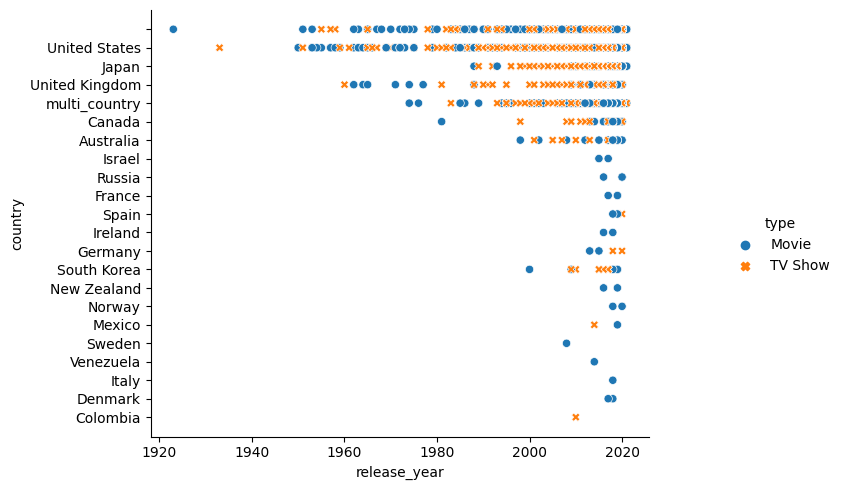

In [ ]:
df['country'] = df['country'].apply(lambda x: "multi_country" if ',' in str(x) else x)
data1 = df
# Replace cells with multiple values with "multi value"
data1['listed_in'] = data1['listed_in'].apply(lambda x: "multi_category" if ',' in str(x) else x)
data2 = data1
g=sns.relplot(x='release_year',y='country',data=data2,hue='type',style='type')
g.fig.set_size_inches(10,5)
plt.show()

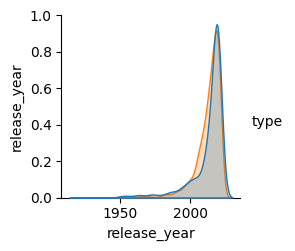

In [ ]:
sns.pairplot(data2,hue="type")
plt.show()

array([[<Axes: title={'center': 'release_year'}>]], dtype=object)

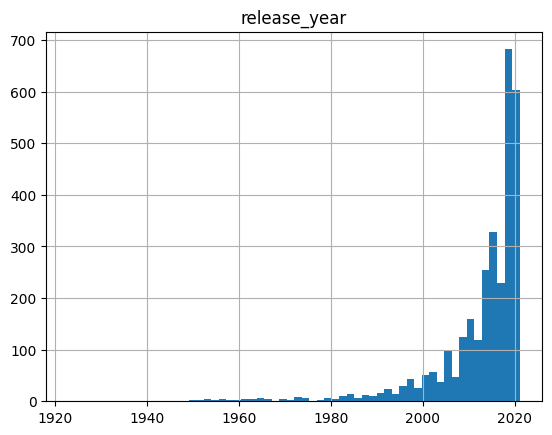

In [ ]:
data2.hist(bins=60)

In [ ]:
data2.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
season_count    object
dtype: object


# New Section